In [ ]:
R.version.string

[1] "R version 4.2.3 (2023-03-15)"

Next, let's get MLR3 going. You'll first need to run `install.packages` in order to install the MLR3 package. Then, `library("mlr3")` will load in the MLR3 library.

Run this code snippet to load up MLR3:

In [ ]:
install.packages("mlr3verse")
library("mlr3")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘modeltools’, ‘DEoptimR’, ‘globals’, ‘listenv’, ‘PRROC’, ‘mclust’, ‘flexmix’, ‘prabclus’, ‘diptest’, ‘robustbase’, ‘kernlab’, ‘gridExtra’, ‘checkmate’, ‘future’, ‘future.apply’, ‘lgr’, ‘mlbench’, ‘mlr3measures’, ‘parallelly’, ‘palmerpenguins’, ‘clue’, ‘fpc’, ‘viridis’, ‘mlr3’, ‘bbotk’, ‘mlr3cluster’, ‘mlr3data’, ‘mlr3filters’, ‘mlr3fselect’, ‘mlr3hyperband’, ‘mlr3learners’, ‘mlr3misc’, ‘mlr3pipelines’, ‘mlr3tuning’, ‘mlr3tuningspaces’, ‘mlr3viz’, ‘paradox’




## Loading a Dataset

Let's start by loading in a dataset to work with. In MLR3, datasets are stored in objects called "tasks". We'll be working with the Palmer Penguins dataset, which is a built in task. 

`tsk()` will load in penguins as a task.

Run the following code snippet to load up your penguins:

In [ ]:
task = tsk("penguins")

## Getting to Know Your Dataset + Simple Data Visualizations

We'll walk through some basic functionality of visualising data in MLR3. 

We can use `head(task)`, where `task` is the task we're working on, to visualize a table for the first couple of values of our data. This can be helpful to view a snapshot of the data in your set in an elegant overview, but may not be indicative of the values in the dataset as a whole.

In [ ]:
head(task)

species,bill_depth,bill_length,body_mass,flipper_length,island,sex,year
<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<fct>,<int>
Adelie,18.7,39.1,3750,181,Torgersen,male,2007
Adelie,17.4,39.5,3800,186,Torgersen,female,2007
Adelie,18.0,40.3,3250,195,Torgersen,female,2007
Adelie,NA,NA,NA,NA,Torgersen,NA,2007
Adelie,19.3,36.7,3450,193,Torgersen,female,2007
Adelie,20.6,39.3,3650,190,Torgersen,male,2007


Likewise, we can use `tail(task)` to visualize some of the last values in the dataset. Here, we'll look at the last few values of the penguins dataset.

In [ ]:
tail(task)

species,bill_depth,bill_length,body_mass,flipper_length,island,sex,year
<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<fct>,<int>
Chinstrap,17.0,45.7,3650,195,Dream,female,2009
Chinstrap,19.8,55.8,4000,207,Dream,male,2009
Chinstrap,18.1,43.5,3400,202,Dream,female,2009
Chinstrap,18.2,49.6,3775,193,Dream,male,2009
Chinstrap,19.0,50.8,4100,210,Dream,male,2009
Chinstrap,18.7,50.2,3775,198,Dream,female,2009


ML often requires you to manually call features based on their name as a string, i.e. `"bill_depth"`. You can quickly view all of the features as strings using `features`, and the target of the data using `target` with the below syntax.

In [ ]:
task$col_roles$feature
task$col_roles$target

[1] "bill_depth"     "bill_length"    "body_mass"      "flipper_length"
[5] "island"         "sex"            "year"

[1] "species"

To summarize the data, `task` can also be used.

In [ ]:
task

<TaskClassif:penguins> (344 x 8): Palmer Penguins
* Target: species
* Properties: multiclass
* Features (7):
  - int (3): body_mass, flipper_length, year
  - dbl (2): bill_depth, bill_length
  - fct (2): island, sex

## Classification Model - Decision Trees

This example will demonstrate how the mlr3 library can be used to create decision trees. We'll be training and testing a model to predict the species of penguins.

The MLR3 equivalent of a Decision Tree Classifier uses the `classif.rpart` decision tree model. We can use the sugar function `lrn(classifier)`, where `classifier` is the name of the classifier to be used, to initialize our tree.

We'll first create the classifier, and then train/test the data.

In [ ]:
penguins_classifier = lrn("classif.rpart")

### Train/Test Data Sets

Now that we have our classifier, we can begin to split the data into train/test sets.

Our seed is 4 - which is an arbitrary randomizer seed that allows for data replication.

We then can use `partition` to split the task into train/test sets. We set `ratio` to 0.8 as we'll be training on an 80/20 split, where 80% of our data will be the train set, and 20% of our data will be the test set.

In [ ]:
set.seed(4)
splitPenguins = partition(task, ratio = 0.8)

### Building a DecisionTreeClassifier

Now, we can train our `penguins_classifier`.

`$train(task, splitPenguins$train)` will train our classifier on the train dataset we created previously.

Then, we create a prediction by using `$predict(task, splitPenguins$test)` to predict with our test dataset.

In [ ]:
penguins_classifier$train(task, splitPenguins$train)
prediction = penguins_classifier$predict(task, splitPenguins$test)
prediction$truth

[1] Adelie    Adelie    Adelie    Adelie    Adelie    Adelie    Adelie   
 [8] Adelie    Adelie    Adelie    Adelie    Adelie    Adelie    Adelie   
[15] Adelie    Adelie    Adelie    Adelie    Adelie    Adelie    Adelie   
[22] Adelie    Adelie    Adelie    Adelie    Adelie    Adelie    Adelie   
[29] Adelie    Adelie    Gentoo    Gentoo    Gentoo    Gentoo    Gentoo   
[36] Gentoo    Gentoo    Gentoo    Gentoo    Gentoo    Gentoo    Gentoo   
[43] Gentoo    Gentoo    Gentoo    Gentoo    Gentoo    Gentoo    Gentoo   
[50] Gentoo    Gentoo    Gentoo    Gentoo    Gentoo    Gentoo    Chinstrap
[57] Chinstrap Chinstrap Chinstrap Chinstrap Chinstrap Chinstrap Chinstrap
[64] Chinstrap Chinstrap Chinstrap Chinstrap Chinstrap Chinstrap
Levels: Adelie Chinstrap Gentoo

## Evaulating Performance

We can measure the performance of our model by using classification error. 0% error is low error, while 100% error is high error. We'll create a measure by using `msr()` with classification error, and then score our prediction based off of it.

In [ ]:
measure = msr("classif.ce")
prediction$score(measure)

measure_acc = msr("classif.acc")
prediction$score(measure_acc)

classif.ce 
0.02898551

classif.acc 
  0.9710145

Hey, that's not all that bad-- about 2.8% of our test data was incorrectly classified. However, it should be noted that we don't actually know if this is an accurate representation of how well our model is performing.

This is because of "lucky" vs "unlucky" splits. It seems like we got a pretty lucky split using our seed of `4`, however, we could have gotten significantly less accurate classifications if we'd chosen a different seed. 

So how do we get an accurate representation of this model's performance?

### Resampling

Below are examples of popular resampling methods and how they are implemented in MLR3.

MLR3 utilizes the sugar figure `rsmp()` to instantiate resampling. 
The function `rsmp(resamp_method)$param_set.` where `resamp_method` is your resampling method will print the parameters of the resampling.

#### Holdout/Train-Test Split

>We're already familiar with Holdout resampling. Holdout resampling splits the data into train/test splits, where the model is trained on the train set and tested on the test set. The most common split is a 80% train 20% test split.

>It accepts the parameters:
- `ratio` - optional, the % of data to put in the training set. By default this is 2/3rds.



In [ ]:
rsmp("holdout", ratio = n)

<ResamplingHoldout>: Holdout
* Iterations: 1
* Instantiated: FALSE
* Parameters: ratio=0.6667

<ResamplingHoldout>: Holdout
* Iterations: 1
* Instantiated: FALSE
* Parameters: ratio=0.6667

#### K-fold Cross Validation

>  Here, the training set is split into `n` smaller sets. The performance measure reported by k-fold cross-validation is then the average of the values computed in the loops, which are executed as follows:

> - A model is trained using `n-1` of the folds as training data.
- the resulting model is validated on the remaining part of the data (i.e., it is used as a test set to compute a performance measure such as accuracy). 

> It accepts the parameters:
- `folds` - # of folds (also known as samples) in the dataset. i.e. `folds = 4` would fold four times, splitting the data into 4 samples, each sample holding 25% of the datset. By default this is 10.



In [ ]:
rsmp("cv" , folds = n)

#### Bootstrap
>Bootstrap samples from the dataset using repeated data samples from a dataset with replacement.

> It accepts the parameters:
- `repeats` - # of repetitions - at minimum, 20-30.
- `ratio` - the ratio of observations to put in train sets. It's good practice to use 90-100 for small datasets, and 50-90 for larger datasets.

In [ ]:
rsmp("bootstrap", repeats = n, ratio = n)

#### Leave-One-Out
>This resampling method uses one data point as the test set for each iteration.

>It has no parameters.

In [ ]:
rsmp("loo")

#### Using Resampling to Train a Model

Let's use K-fold cross-validation to train a model! We'll be using a K-fold with the default parameter of 10 folds.

To start resampling we need to instantiate a resamplingResult object using `resample()`.
`resample` accepts the parameters:

- task - the task (ours is the penguins dataset)
- learner - the chosen learner (ours is our `penguins_classifier`)
- resampling method - the chosen resampling method (here, we use cross-validation)
- store_models - default is false to limit memory consumtion, set to true to examine individual models.

After we resample, let's take a look at our`pengs_cv`.

In [ ]:
cv = rsmp("cv")
pengs_cv = resample(task, penguins_classifier, cv, store_models = TRUE)
pengs_cv

INFO  [21:37:00.588] [mlr3] Applying learner 'classif.rpart' on task 'penguins' (iter 1/10)
INFO  [21:37:00.625] [mlr3] Applying learner 'classif.rpart' on task 'penguins' (iter 2/10)
INFO  [21:37:00.659] [mlr3] Applying learner 'classif.rpart' on task 'penguins' (iter 3/10)
INFO  [21:37:00.700] [mlr3] Applying learner 'classif.rpart' on task 'penguins' (iter 4/10)
INFO  [21:37:00.740] [mlr3] Applying learner 'classif.rpart' on task 'penguins' (iter 5/10)
INFO  [21:37:00.780] [mlr3] Applying learner 'classif.rpart' on task 'penguins' (iter 6/10)
INFO  [21:37:00.816] [mlr3] Applying learner 'classif.rpart' on task 'penguins' (iter 7/10)
INFO  [21:37:00.854] [mlr3] Applying learner 'classif.rpart' on task 'penguins' (iter 8/10)
INFO  [21:37:00.896] [mlr3] Applying learner 'classif.rpart' on task 'penguins' (iter 9/10)
INFO  [21:37:00.951] [mlr3] Applying learner 'classif.rpart' on task 'penguins' (iter 10/10)


<ResampleResult> with 10 resampling iterations
  task_id    learner_id resampling_id iteration warnings errors
 penguins classif.rpart            cv         1        0      0
 penguins classif.rpart            cv         2        0      0
 penguins classif.rpart            cv         3        0      0
 penguins classif.rpart            cv         4        0      0
 penguins classif.rpart            cv         5        0      0
 penguins classif.rpart            cv         6        0      0
 penguins classif.rpart            cv         7        0      0
 penguins classif.rpart            cv         8        0      0
 penguins classif.rpart            cv         9        0      0
 penguins classif.rpart            cv        10        0      0

We can quantify the predictive performance of our model by using our `measure_acc` measure as we did to initially quantify the performance of our non-crossvalidated model. This will show us the accuracy of all of our folds.

In [ ]:
pengs_cv$score(measure_acc)

task,task_id,learner,learner_id,resampling,resampling_id,iteration,prediction,classif.acc
<list>,<chr>,<list>,<chr>,<list>,<chr>,<int>,<list>,<dbl>
<environment: 0x55a444a68710>,penguins,<environment: 0x55a445136d10>,classif.rpart,<environment: 0x55a44113ef40>,cv,1,<environment: 0x55a442efaf50>,1.0000000
<environment: 0x55a444a68710>,penguins,<environment: 0x55a440ac2338>,classif.rpart,<environment: 0x55a44113ef40>,cv,2,<environment: 0x55a443ac6c60>,0.9142857
<environment: 0x55a444a68710>,penguins,<environment: 0x55a440015b38>,classif.rpart,<environment: 0x55a44113ef40>,cv,3,<environment: 0x55a44325abb0>,0.9142857
<environment: 0x55a444a68710>,penguins,<environment: 0x55a43ec63540>,classif.rpart,<environment: 0x55a44113ef40>,cv,4,<environment: 0x55a443beb030>,0.9142857
<environment: 0x55a444a68710>,penguins,<environment: 0x55a442d1ddc0>,classif.rpart,<environment: 0x55a44113ef40>,cv,5,<environment: 0x55a444a5b468>,0.8823529
<environment: 0x55a444a68710>,penguins,<environment: 0x55a444467b48>,classif.rpart,<environment: 0x55a44113ef40>,cv,6,<environment: 0x55a443e0e830>,1.0000000
<environment: 0x55a444a68710>,penguins,<environment: 0x55a440c83298>,classif.rpart,<environment: 0x55a44113ef40>,cv,7,<environment: 0x55a443e94568>,1.0000000
<environment: 0x55a444a68710>,penguins,<environment: 0x55a442bfb968>,classif.rpart,<environment: 0x55a44113ef40>,cv,8,<environment: 0x55a4441ff7b8>,0.9705882
<environment: 0x55a444a68710>,penguins,<environment: 0x55a443064488>,classif.rpart,<environment: 0x55a44113ef40>,cv,9,<environment: 0x55a44425dbc0>,0.9411765


classif.ce 
0.05512605

We can also calculate the aggregate score of all of these accuracies using `aggregate()` The aggregated score refers to the overall performance of our selected learner on the given task estimated by the resampling strategy.

In [ ]:
pengs_cv$aggregate(msr("classif.ce"))

classif.ce 
0.05512605

### Evaluating Model Performance Using Confusion Matrices

We can also use a confusion matrix to get a better idea of how our model has performed. It shows how many datapoints were correctly and incorrectly classified. 

The diagonal values represent the number of correct predictions, and all other values are incorrect predictions.

In [ ]:
pengs_cv$predictions(predict_sets = "test")[[1]]$confusion

           truth
response    Adelie Chinstrap Gentoo
  Adelie        20         1      0
  Chinstrap      1         4      0
  Gentoo         0         0      9

We can also visualize the performance of our individual folds using a graph with `autoplot()`.

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



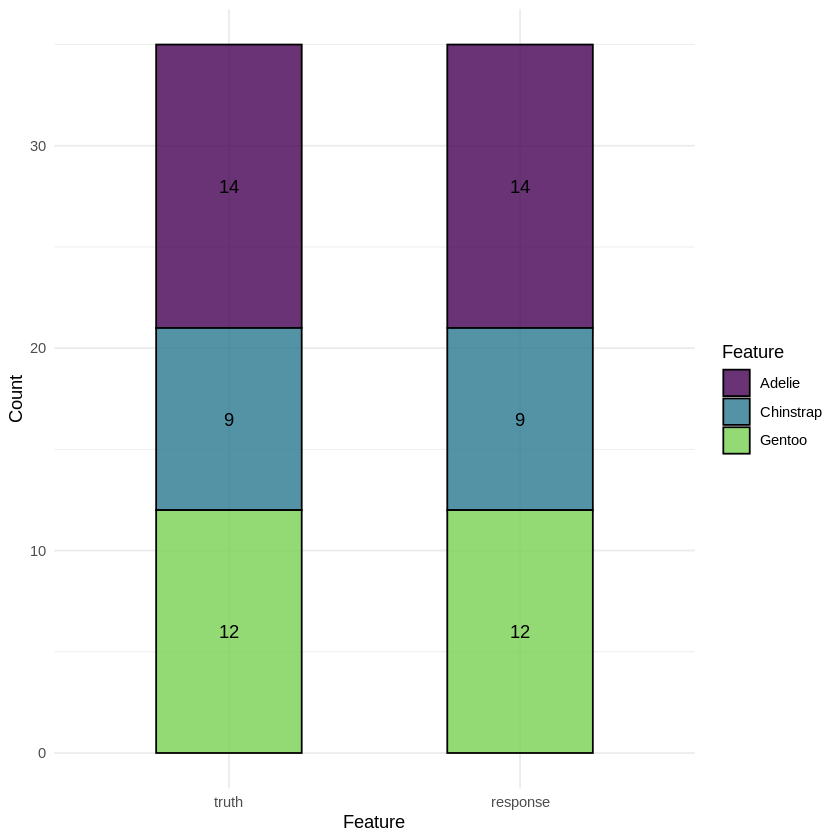

In [ ]:
install.packages("mlr3viz")
library("mlr3viz")
autoplot(pengs_cv$predictions(predict_sets = "test")[[1]])

## Benchmarking
Benchmarking is the comparaison of different learners on a single task or multiple tasks. The end goal of benchmaking is to identify the best performing learner for a given problem or task

In mlr3, to conduct a benchmarking experiement, we follow these steps: 

*   construct a benchmarking design
*   run the benchmarking experiment
*   evaluate the performance of each learner

#### Constructing a benchmarking design
We generate the benchmarking design using `benchmark_grid()` function.

`benchmark_grid` accepts as parameters:
*   a list of tasks 
*   a list of learners 
*   a list of resamplings

`benchmark_grid` creates a design in an `expand.grid()` fashion (cartesian product), it generates unique combinations of Task, Learner and Resampling triplets.

In [ ]:
library("mlr3verse")
tasks = tsks(c("iris","penguins","sonar"))
learners = lrns(c("classif.rpart","classif.featureless"))
resamplings = rsmps("cv", folds = 5)
design = benchmark_grid(tasks, learners, resamplings)
print(design)

       task             learner resampling
1:     iris       classif.rpart         cv
2:     iris classif.featureless         cv
3: penguins       classif.rpart         cv
4: penguins classif.featureless         cv
5:    sonar       classif.rpart         cv
6:    sonar classif.featureless         cv


#### Execution of benchmark experiments
To run a benchmark experiement, we use the `benchmark()` function. It accepts as a parameter the benchmark design.

`benchmark` will internally call `resample()` for all the combinations of tasks, learners and resampling strategies in our benchmark design.





In [ ]:
bmr = benchmark(design)

INFO  [21:14:09.656] [mlr3] Running benchmark with 30 resampling iterations
INFO  [21:14:09.848] [mlr3] Applying learner 'classif.rpart' on task 'iris' (iter 1/5)
INFO  [21:14:10.071] [mlr3] Applying learner 'classif.rpart' on task 'iris' (iter 2/5)
INFO  [21:14:10.116] [mlr3] Applying learner 'classif.rpart' on task 'iris' (iter 3/5)
INFO  [21:14:10.162] [mlr3] Applying learner 'classif.rpart' on task 'iris' (iter 4/5)
INFO  [21:14:10.524] [mlr3] Applying learner 'classif.rpart' on task 'iris' (iter 5/5)
INFO  [21:14:10.570] [mlr3] Applying learner 'classif.featureless' on task 'iris' (iter 1/5)
INFO  [21:14:10.599] [mlr3] Applying learner 'classif.featureless' on task 'iris' (iter 2/5)
INFO  [21:14:10.626] [mlr3] Applying learner 'classif.featureless' on task 'iris' (iter 3/5)
INFO  [21:14:10.653] [mlr3] Applying learner 'classif.featureless' on task 'iris' (iter 4/5)
INFO  [21:14:10.681] [mlr3] Applying learner 'classif.featureless' on task 'iris' (iter 5/5)
INFO  [21:14:10.708] [ml

In [ ]:
print(bmr)

<BenchmarkResult> of 30 rows with 6 resampling runs
 nr  task_id          learner_id resampling_id iters warnings errors
  1     iris       classif.rpart            cv     5        0      0
  2     iris classif.featureless            cv     5        0      0
  3 penguins       classif.rpart            cv     5        0      0
  4 penguins classif.featureless            cv     5        0      0
  5    sonar       classif.rpart            cv     5        0      0
  6    sonar classif.featureless            cv     5        0      0

#### Evaluating performance
We can use `$aggregate()` method of the returned `BenchmarkResult` to evaluate the performance of each learner.



In [ ]:
acc = bmr$aggregate(msr("classif.acc"))
acc[, .(task_id, learner_id, classif.acc)]

task_id,learner_id,classif.acc
<chr>,<chr>,<dbl>
iris,classif.rpart,0.9466667
iris,classif.featureless,0.2933333
penguins,classif.rpart,0.9360188
penguins,classif.featureless,0.4418585
sonar,classif.rpart,0.6777003
sonar,classif.featureless,0.5335656


To visualize the performance of each learner, we can use `autoplot`. A box plot will be generated by default.

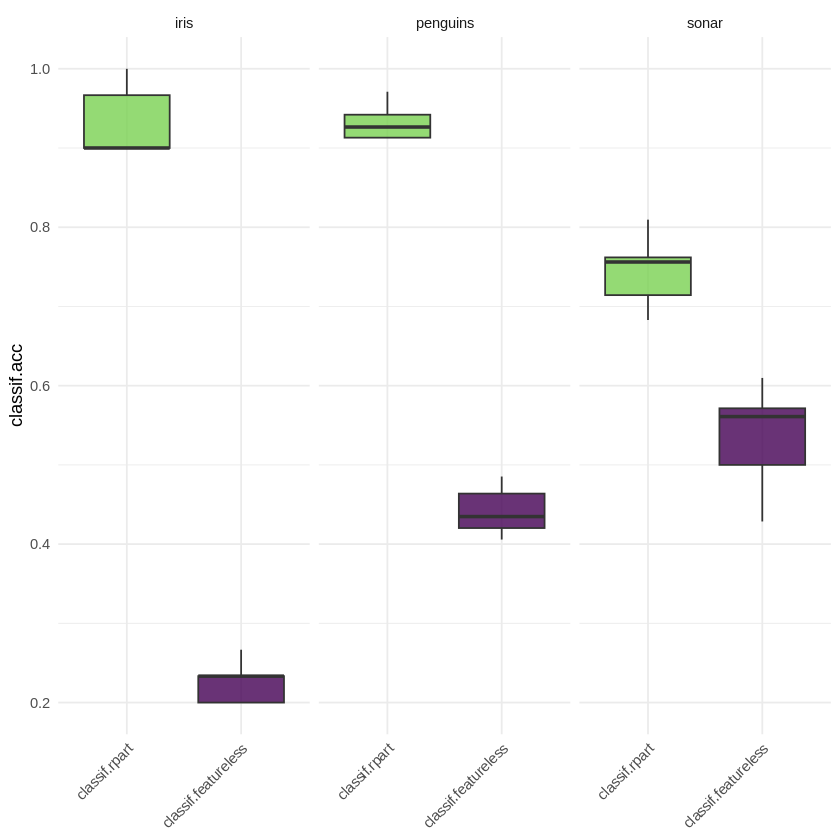

In [ ]:
autoplot(bmr, measure = msr("classif.acc"))

#### BenchmarkResult Objects

A benchmarkResult object is a collection of multiple ResampleResult objects.

We can use `as.data.table()` to take a look at the contents of the benchmarkResult object and compare them to the data.table of the resmaplingResult Object from the resampling section 



In [ ]:
bmrdt = as.data.table(bmr)
names(bmrdt)

[1] "uhash"      "task"       "learner"    "resampling" "iteration" 
[6] "prediction"

In [ ]:
rrdt = as.data.table(pengs_cv)
names(rrdt)

[1] "task"       "learner"    "resampling" "iteration"  "prediction"

If we don't take into consideration the `uhash` column, we'll notice that benchmarkResult and resamplingResult have the same columns.

The stored ResampleResults can be extracted via the `$resample_result(i)` method, where i is the index of the performed benchmark experiment. This allows us to investigate the extracted ResampleResult or individual resampling iterations as shown previously

In [ ]:
rr1 = bmr$resample_result(1)
rr2 = bmr$resample_result(2)

In [ ]:
rr1

<ResampleResult> with 5 resampling iterations
 task_id    learner_id resampling_id iteration warnings errors
    iris classif.rpart            cv         1        0      0
    iris classif.rpart            cv         2        0      0
    iris classif.rpart            cv         3        0      0
    iris classif.rpart            cv         4        0      0
    iris classif.rpart            cv         5        0      0

In [ ]:
rr2

<ResampleResult> with 5 resampling iterations
 task_id          learner_id resampling_id iteration warnings errors
    iris classif.featureless            cv         1        0      0
    iris classif.featureless            cv         2        0      0
    iris classif.featureless            cv         3        0      0
    iris classif.featureless            cv         4        0      0
    iris classif.featureless            cv         5        0      0

Multiple ResampleResults can be again converted to a BenchmarkResult with the function `as_benchmark_result()` combined with `c()`.

In [ ]:
bmr1 = as_benchmark_result(rr1)
bmr2 = as_benchmark_result(rr2)
bmr_combined = c(bmr1, bmr2)

In [ ]:
bmr_combined

<BenchmarkResult> of 10 rows with 2 resampling runs
 nr task_id          learner_id resampling_id iters warnings errors
  1    iris       classif.rpart            cv     5        0      0
  2    iris classif.featureless            cv     5        0      0